**Note: be sure to add the folder Brown-Datathon-Public-2020 to your drive (you can do this using the dropdown arrow next to the folder in the path header in drive) before running this notebook.**

## Presets

In [0]:
# Make necessary/useful imports here
import pandas as pd
import random
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Set pandas options to not truncate
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Mount data 
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
root_path = 'gdrive/My Drive/Brown-Datathon-Public-2020/Citizens-Home-Financing-Challenge/data/'



## Data Dictionaries

In [0]:
# Look over filenames and dimensions of provided and withheld sets
pd.read_csv(root_path + "dictionaries/datathon_summary.csv")

,File Name,# Rows,# Fields,Summary of Fields,Notes
0,zip9_coded_201904_pv,6009259,53,April snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
1,zip9_coded_201905_pv,6009259,53,May snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
2,zip9_coded_201906_pv,6009259,53,June snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
3,zip9_coded_201907_pv,6009259,53,July snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
4,zip9_coded_201908_pv,6009259,53,August snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
5,zip9_coded_201909_pv,6009259,53,September snapshot of Experian data,"""pv"" stands for ""provided""; students will have this set"
6,zip9_demographics_coded_pv,6009259,7,Demographic and homebuyer data,"""pv"" stands for ""provided""; students will have this set"
7,zip9_coded_201904_wh,667418,53,April snapshot of Experian data,"""wh"" stands for ""withheld"""
8,zip9_coded_201905_wh,667418,53,May snapshot of Experian data,"""wh"" stands for ""withheld"""
9,zip9_coded_201906_wh,667418,53,June snapshot of Experian data,"""wh"" stands for ""withheld"""


In [0]:
# Of the demographics/homebuyer data, observe provided field descriptions
pd.read_csv(root_path + "dictionaries/zip9_demographics_coded_dict.csv")

,Index,Variable,Type,Description,Notes
0,1,zip5,Char,Five digit zip code,NaN
1,2,zip9_code,Num,Numerical key matching to a zip9 region,NaN
2,3,age,Num,Average age in the zip9 region,May skew high since we only look at credit-active adults
3,4,household_count,Num,Number of households in the zip9 region,This dataset excludes any row with four or less households
4,5,person_count,Num,Number of people in the zip9 region,NaN
5,6,homebuyers,Num,Number of people in the zip9 region who bought a home between October - December 2019,NaN
6,7,first_homebuyers,Num,Number of people in the zip9 region who bought their first home home between October - December 2019,NaN


In [0]:
# Of the credit bureau data, observe provided field descriptions
pd.read_csv(root_path + "dictionaries/zip9_coded_20190X_dict.csv")

,Index,Variable,Type,Description,Notes
0,1,zip5,Char,Five digit zip code,NaN
1,2,zip9_code,Num,Numerical key matching to a zip9 region,NaN
2,3,bankcard_limit,Num,Average bank card limit per cardholder in the zip9 region,For holders of more than one bank card the bank card limit is the sum of limits
3,4,bankcard_balance,Num,Average bank card balance per cardholder in the zip9 region,For holders of more than one bank card the bank card balance is the sum of balances
4,5,bankcard_trades,Num,Average number of open bank cards per person in the zip9 region,NaN
5,6,bankcard_util,Num,Average ratio of bank card balance to limit per cardholder in the zip9 region,NaN
6,7,total_revolving_limit,Num,Average sum of bank card/other revolving/installment limits per person in the zip9 region,NaN
7,8,total_revolving_balance,Num,Average sum of bank card/other revolving/installment balances per person in the zip9 region,NaN
8,9,total_revolving_trades,Num,Average number of open bank card/other revolving/installment trades per person in the zip9 region,NaN
9,10,total_revolving_util,Num,Average ratio of total revolving balance to limit per person in the zip9 region,NaN


## Looking at Data Samples

In [0]:
# Here, we look at a random sample of the demographic/homebuyer data and of the September credit bureau
#  snapshot. The sample size in this template is kept quite small so it runs quickly as an example, so
#  please adjust it to your preferences/requirements

# Pandas can have trouble dealing with moderately large data, here's a sampling example
n = 6009259 # number of records in file
s = 60000 # sample size (can/should be changed to your preference)

skip_list = sorted(random.sample(range(1,n+1),n-s))
sep_df = pd.read_csv(root_path + "zip9_coded_201909_pv.csv", skiprows=skip_list, dtype={'zip5': str})
demo_df = pd.read_csv(root_path + "zip9_demographics_coded_pv.csv", skiprows=skip_list, dtype={'zip5': str})

# Take a look at a few examples in the September credit bureau snapshot
sep_df.head()

# TIP: Many Python libraries perform better with the magnitude of data provided, such as PySpark or Dask.
#  Theses packages are well-documented online. We leave it up to you to decide how to handle the moderately
#  large data. Alternatively, you can also read by chunks via pandas, although there are limitations to it

,zip5,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open
0,01001,221734,28106.578947,3509.210526,3.842105,0.254393,37103.526316,4881.210526,6.368421,0.232128,116539.375,92464.5,0.421053,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,116539.375,92464.5,0.421053,73.25,43000.0,20787.200000,0.263158,35000.0,24324.0,0.105263,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,57000.0,30516.800000,0.368421,34.800000,0.578947,0.210526,0.947368,0.263158,0.421053
1,01001,684751,12316.083333,4041.000000,1.750000,0.386545,13576.083333,4633.416667,2.583333,0.360452,199090.000,175958.0,0.083333,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,199090.000,175958.0,0.083333,88.00,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,0.416667,0.166667,0.583333,0.000000,0.083333
2,01001,1454505,53040.750000,6768.250000,4.950000,0.204421,63413.700000,7450.950000,7.500000,0.212537,149450.200,115877.6,0.500000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,149450.200,115877.6,0.500000,74.50,43635.0,37689.333333,0.150000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,43635.0,37689.333333,0.150000,91.333333,0.300000,0.300000,0.950000,0.100000,0.500000
3,01001,1551929,14636.266667,3693.800000,3.333333,0.472223,19498.266667,5906.600000,5.266667,0.422645,209832.000,178220.5,0.133333,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,209832.000,178220.5,0.133333,85.00,28000.0,20222.000000,0.066667,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,28000.0,20222.000000,0.066667,72.000000,0.400000,0.066667,0.600000,0.066667,0.133333
4,01001,3389813,13507.540000,482.260000,1.320000,0.052916,14718.920000,497.100000,2.100000,0.057681,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,188700.0,139742.000000,0.040000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,188700.0,139742.000000,0.040000,74.000000,0.000000,0.000000,0.740000,0.040000,0.000000


In [0]:
# Check the datatypes of the fields in the September credit bureau snapshot
# These should reflect the fields seen in the data dictionary
sep_df.dtypes

zip5                         object 
zip9_code                    int64  
bankcard_limit               float64
bankcard_balance             float64
bankcard_trades              float64
bankcard_util                float64
total_revolving_limit        float64
total_revolving_balance      float64
total_revolving_trades       float64
total_revolving_util         float64
mortgage1_limit              float64
mortgage1_balance            float64
mortgage1_open               float64
mortgage2_limit              float64
mortgage2_balance            float64
mortgage2_open               float64
mortgage3_limit              float64
mortgage3_balance            float64
mortgage3_open               float64
mortgage4_limit              float64
mortgage4_balance            float64
mortgage4_open               float64
mortgage5_limit              float64
mortgage5_balance            float64
mortgage5_open               float64
total_mortgage_limit         float64
total_mortgage_balance       float64
t

In [0]:
# Take a look at a few examples in the demographic/homebuyer data
demo_df.head()

,zip5,zip9_code,age,household_count,person_count,homebuyers,first_homebuyers
0,01001,284216,51.200055,5,8,0,0
1,01001,469529,44.009826,6,12,0,0
2,01001,795357,49.273184,8,22,0,0
3,01001,3044653,40.600780,10,17,0,0
4,01001,4452284,50.332986,6,7,0,0


In [0]:
# Check the datatypes of the fields in the demographic/homebuyer data
# These should reflect the fields seen in the data dictionary; particularly, homebuyers and first_homebuyers
#  are of the most interest, as they are the targets
demo_df.dtypes

zip5                object 
zip9_code           int64  
age                 float64
household_count     int64  
person_count        int64  
homebuyers          int64  
first_homebuyers    int64  
dtype: object

## Basic Exploration of Data Samples

In [0]:
# Exploratory data analysis is imperative to understanding datasets/target fields, assessing which fields
#  may be necessary in predictive analysis, which types of models are viable, and what other pre-processing
#  techniques may be necessary prior to training. Here is a very rudimentary start to exploring

# Look at summary of the fields in the September credit bureau snapshot
# Certain fields will have missing values, think about how to handle these
sep_df.describe()

,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open
count,6.000000e+04,60000.000000,60000.000000,60000.000000,59661.000000,60000.000000,60000.000000,60000.000000,59891.000000,4.888400e+04,4.888400e+04,60000.000000,1.354500e+04,1.354500e+04,60000.000000,4.450000e+03,4.450000e+03,60000.000000,1.704000e+03,1.704000e+03,60000.000000,7.690000e+02,7.690000e+02,60000.000000,4.903200e+04,4.903200e+04,60000.000000,48882.000000,2.798000e+04,2.798000e+04,60000.000000,3.751000e+03,3.751000e+03,60000.000000,7.210000e+02,7.210000e+02,60000.000000,2.180000e+02,2.180000e+02,60000.000000,70.000000,70.000000,60000.000000,2.834500e+04,2.834500e+04,60000.000000,27969.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,3.332068e+06,20159.334211,4091.008098,2.280267,0.344263,25550.351060,6329.544807,3.606003,0.342967,2.043246e+05,1.765117e+05,0.273662,2.090858e+05,1.685894e+05,0.022621,2.042881e+05,1.583962e+05,0.006340,2.078651e+05,1.588007e+05,0.002263,2.025114e+05,1.529650e+05,0.001011,2.237120e+05,1.917237e+05,0.305897,83.701479,7.952036e+04,3.757680e+04,0.072386,8.564187e+04,3.989310e+04,0.005611,8.920576e+04,3.682695e+04,0.000985,1.023141e+05,4.531711e+04,0.000310,92043.971429,25464.914286,0.000100,8.488378e+04,4.006338e+04,0.079391,53.427769,0.313859,0.166628,0.684126,0.069434,0.277929
std,1.929060e+06,15673.388485,3406.080461,1.120212,0.191587,18219.470303,6309.309615,1.588184,0.193380,1.525707e+05,1.410927e+05,0.213107,1.847596e+05,1.690275e+05,0.051806,2.147431e+05,1.967547e+05,0.026471,2.419607e+05,2.244671e+05,0.015401,1.961433e+05,1.561922e+05,0.010461,1.875952e+05,1.705841e+05,0.247787,75.757530,9.059208e+04,5.520149e+04,0.104875,1.191809e+05,8.318619e+04,0.025534,1.359361e+05,8.342249e+04,0.010255,1.397853e+05,1.163975e+05,0.005874,123638.248206,54258.127128,0.003439,1.021259e+05,6.255116e+04,0.117718,49.426285,0.175362,0.132980,0.215206,0.102918,0.215205
min,8.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+03,0.000000e+00,0.000000,300.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.669945e+06,8072.427206,1694.764423,1.487649,0.205303,11948.242674,2747.194328,2.533333,0.213101,1.113707e+05,9.153983e+04,0.090909,1.010000e+05,6.971200e+04,0.000000,9.083433e+04,5.830150e+04,0.000000,9.341900e+04,6.053350e+04,0.000000,9.100000e+04,5.442500e+04,0.000000,1.157515e+05,9.480962e+04,0.090909,77.400000,3.000000e+04,8.784000e+03,0.000000,2.500000e+04,0.000000e+00,0.000000,2.500000e+04,0.000000e+00,0.000000,2.500000e+04,0.000000e+00,0.000000,27104.500000,0.000000,0.000000,3.171425e+04,9.115000e+03,0.000000,26.000000,0.181818,0.071429,0.555556,0.000000,0.090909
50%,3.320270e+06,16800.074866,3315.645833,2.250000,

In [0]:
# Look at summary of the fields in the demographic/homebuyer data
demo_df.describe()

# TIP: Note that the targets (homebuyers/first homebuyers) have very low average values; this means that not
#  many zip9 have non-zero values for these fields, which may become an issue if you train as is, or use a
#  model that cannot accommodate this bias. Some options to deal with this, which you may already be aware of,
#  involve selective sampling from the raw data to ensure a more balanced target distribution, and algorithms
#  like SMOTE (Synthetic Minority Oversampling Technique) that will synthesize minority examples. Failure to
#  account for this may lead to predictions of only zero

,zip9_code,age,household_count,person_count,homebuyers,first_homebuyers
count,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,3.332068e+06,46.042464,8.565100,16.083417,0.041900,0.023483
std,1.929060e+06,7.896492,4.454615,9.171668,0.245449,0.176538
min,8.500000e+01,22.324924,5.000000,5.000000,0.000000,0.000000
25%,1.669945e+06,40.904679,6.000000,10.000000,0.000000,0.000000
50%,3.320270e+06,45.280925,7.000000,14.000000,0.000000,0.000000
75%,5.011578e+06,50.150217,10.000000,19.000000,0.000000,0.000000
max,6.676607e+06,87.391413,168.000000,222.000000,4.000000,3.000000


0    58050
1    1420 
2    501  
3    24   
4    5    
Name: homebuyers, dtype: int64

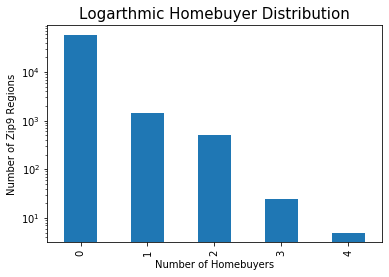

In [0]:
# Visualize the distribution of the homebuyer field on a log scale
figure, ax = plt.subplots()
plt.title('Logarthmic Homebuyer Distribution', fontsize=15)
plt.xlabel('Number of Homebuyers', fontsize=10)
plt.ylabel('Number of Zip9 Regions', fontsize=10)
ax.set_yscale('log')
demo_df['homebuyers'].value_counts().plot(ax=ax, kind='bar')
demo_df['homebuyers'].value_counts()

In [0]:
# Many of the fields are kept separate from the targets, so having a merged set would be valuable
sep_demo_merge = sep_df.merge(demo_df,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')

In [0]:
sep_demo_merge.head()

,zip5_sep,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open,zip5_demo,age,household_count,person_count,homebuyers,first_homebuyers
0,01001,221734,28106.578947,3509.210526,3.842105,0.254393,37103.526316,4881.210526,6.368421,0.232128,116539.375,92464.5,0.421053,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,116539.375,92464.5,0.421053,73.25,43000.0,20787.200000,0.263158,35000.0,24324.0,0.105263,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,57000.0,30516.800000,0.368421,34.800000,0.578947,0.210526,0.947368,0.263158,0.421053,01001,51.357794,12,19,0,0
1,01001,684751,12316.083333,4041.000000,1.750000,0.386545,13576.083333,4633.416667,2.583333,0.360452,199090.000,175958.0,0.083333,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,199090.000,175958.0,0.083333,88.00,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,0.416667,0.166667,0.583333,0.000000,0.083333,01001,40.117836,6,12,0,0
2,01001,1454505,53040.750000,6768.250000,4.950000,0.204421,63413.700000,7450.950000,7.500000,0.212537,149450.200,115877.6,0.500000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,149450.200,115877.6,0.500000,74.50,43635.0,37689.333333,0.150000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,43635.0,37689.333333,0.150000,91.333333,0.300000,0.300000,0.950000,0.100000,0.500000,01001,49.010236,11,20,0,0
3,01001,1551929,14636.266667,3693.800000,3.333333,0.472223,19498.266667,5906.600000,5.266667,0.422645,209832.000,178220.5,0.133333,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,209832.000,178220.5,0.133333,85.00,28000.0,20222.000000,0.066667,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,28000.0,20222.000000,0.066667,72.000000,0.400000,0.066667,0.600000,0.066667,0.133333,01001,49.096000,7,15,0,0
4,01001,3389813,13507.540000,482.260000,1.320000,0.052916,14718.920000,497.100000,2.100000,0.057681,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,188700.0,139742.000000,0.040000,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,188700.0,139742.000000,0.040000,74.000000,0.000000,0.000000,0.740000,0.040000,0.000000,01001,79.018779,24,50,0,0


In [0]:
# Having the merged set allows us to look at target-based field distributions
sep_demo_merge.groupby('homebuyers').mean()

,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,mortgage1_limit,mortgage1_balance,mortgage1_open,mortgage2_limit,mortgage2_balance,mortgage2_open,mortgage3_limit,mortgage3_balance,mortgage3_open,mortgage4_limit,mortgage4_balance,mortgage4_open,mortgage5_limit,mortgage5_balance,mortgage5_open,total_mortgage_limit,total_mortgage_balance,total_mortgage_trades,mortgage1_loan_to_value,homeequity1_limit,homeequity1_balance,homeequity1_open,homeequity2_limit,homeequity2_balance,homeequity2_open,homeequity3_limit,homeequity3_balance,homeequity3_open,homeequity4_limit,homeequity4_balance,homeequity4_open,homeequity5_limit,homeequity5_balance,homeequity5_open,total_homeequity_limit,total_homeequity_balance,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open,age,household_count,person_count,first_homebuyers
homebuyers,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.339946e+06,20250.483688,4119.691234,2.282847,0.343229,25750.526482,6423.425184,3.613264,0.342351,203750.982165,175591.245572,0.275189,206959.416087,165707.124023,0.022987,202921.372603,156326.102593,0.006415,204699.207125,156410.10181,0.002468,195633.066865,143801.483532,0.001150,222863.394610,190373.479494,0.308209,88.610842,79006.700934,37348.559594,0.072287,82662.479799,37059.381516,0.005577,89065.917115,37556.815188,0.001078,75926.318627,32841.289216,0.000286,68913.224490,28388.081633,0.000062,83848.766021,39442.057411,0.079289,53.353161,0.313829,0.164989,0.684184,0.069043,0.279590,46.180037,8.495706,15.949920,0.000000
1,3.307746e+06,21881.071912,4486.562007,2.491062,0.325759,27692.583975,6887.691410,3.861452,0.325880,209319.049088,182550.129468,0.291936,194280.313807,156256.249292,0.024738,224823.061237,172803.717172,0.006039,236719.812500,169253.96250,0.001696,179616.375000,143686.875000,0.000697,226021.187845,195365.360146,0.325106,84.009482,75809.890312,38384.551049,0.076375,69919.022059,34321.463235,0.005201,71892.862069,33441.137931,0.001175,71374.000000,25114.444444,0.000415,99792.666667,85456.666667,0.000190,80962.777962,40876.378889,0.083355,53.979391,0.357250,0.201612,0.740443,0.073417,0.297523,43.784670,10.653902,20.015896,0.598988
2,3.223151e+06,23854.695723,4958.218203,2.625768,0.311598,30226.714429,7736.628230,4.050519,0.309860,211017.426072,183427.759980,0.338691,198819.662110,160176.062950,0.026312,218455.688679,156379.465409,0.009210,158291.790909,121331.30000,0.003059,177910.452381,101195.666667,0.000915,230466.922109,198142.498534,0.378187,83.758194,75015.744307,37447.155138,0.076550,78836.387500,41572.225000,0.006678,48642.857143,18959.714286,0.001352,15800.000000,214.000000,0.000302,11473.000000,7079.000000,0.000067,78124.404350,39476.645463,0.084950,55.666889,0.371496,0.194161,0.764972,0.073207,0.343720,44.113094,10.388773,20.083160,1.070686
3,3.875493e+06,24781.343577,4844.931948,2.679049,0.282293,29824.932063,6333.002040,4.133723,0.264524,244505.385918,206835.445571,0.400469,184028.018519,142360.000000,0.018871,269372.500000,216559.250000,0.006037,276000.000000,184622.00000,0.001894,169486.000000,145390.000000,0.000718,254983.932711,214586.135118,0.427988,84.054545,79289.958095,32540.882857,0.049059,58000.000000,51901.000000,0.000651,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,78739.804762,33329.926190,0.049710,52.788571,0.412655,0.226168,0.802121,0.049710,0.404664,42.218855,16.583333,29.916667,1.250000
4,2.298953e+06,40215.084730,4328.000867,3.386664,0.175156,47106.399744,7804.718068,4.776021,0.203885,322683.972490,287637.519857,0.366361,239328.000000,211638.333333,0.029257,227859.000000,202905.000000,0.010000,NaN,NaN,0.000000,NaN,NaN,0.000000,370128.819080,330861.324780,0.405617,88.966866,219312.500000,100596.375000,0.047996,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,219312.500000,100596.375000,0.047996,55.375000,0.3343

Text(0, 0.5, 'Proportion of Homebuyers')

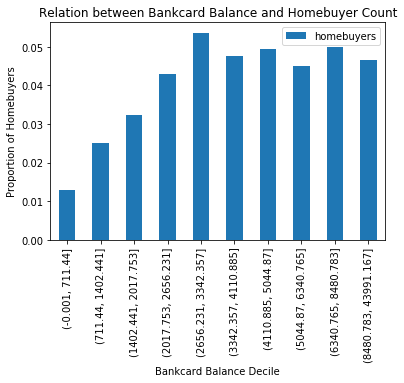

In [0]:
# Having the merged set also allows us to graph how a field may relate to the likelihood of buying a home
test = sep_demo_merge
test['bankcard_balance_decile'] = pd.qcut(sep_demo_merge['bankcard_balance'], q=10)

test = test.pivot_table(columns = ['bankcard_balance_decile'], values = ['homebuyers'])
test = test.transpose()
test['bankcard_balance_decile'] = test.index

test.plot(kind='bar')
plt.title('Relation between Bankcard Balance and Homebuyer Count')
plt.xlabel('Bankcard Balance Decile', fontsize=10)
plt.ylabel('Proportion of Homebuyers', fontsize=10)

## Baseline Model

### Pre-processing

In [0]:
# Before modeling, traditionally you will want to pre-process the data by cleaning, normalizing, imputing,
#  or otherwise converting inputs into the format you want your model to receive. In this case, we are
#  providing a baseline model that will perform this, but not to a high standard

# For simplicity, we will make the (harsh) assumption that the most recent snapshot (September) and
#  demographic/homebuyer information are all that matter for predicting, then get rid of fields with
#  a majority of values missing, which we know from earlier exploration
majority_missing = ['mortgage2_limit','mortgage2_balance','mortgage3_limit','mortgage3_balance',
                    'mortgage4_limit','mortgage4_balance','mortgage5_limit','mortgage5_balance',
                    'homeequity1_limit','homeequity1_balance','homeequity2_limit','homeequity2_balance',
                    'homeequity3_limit','homeequity3_balance','homeequity4_limit','homeequity4_balance',
                    'homeequity5_limit','homeequity5_balance','total_homeequity_limit',
                    'total_homeequity_balance','homeequity1_loan_to_value']
# Remove exploration, secondary target, and other extra fields
other_removals = ['bankcard_balance_decile','first_homebuyers','zip5_sep','zip5_demo','zip9_code'] 
sep_demo_merge_vars = sep_demo_merge.columns.values.tolist()
to_keep = [i for i in sep_demo_merge_vars if i not in majority_missing]
to_keep = [i for i in to_keep if i not in other_removals]
data_final = sep_demo_merge[to_keep]

# TIP: An important piece to consider when preparing to model is which features to select. Some may
#  have little to no predictive ability, and others may be too sparse to be useful. Algorithms such as RFE
#  (Recursive Feature Elimination) can help you decide how to eliminate bad features

In [0]:
# This leaves only fields that are fully populated, and seven fields that are mostly populated
# We will (again, inadvisably) assume that the seven fields with missing values can be imputed with zeroes
# These fields are bankcard_util, total_revolving_util, mortgage1_limit, mortgage1_balance,
#  total_mortgage_limit, total_mortgage_balance, mortgage1_loan_to_value
data_final = data_final.fillna(value=0)

In [0]:
# Our basic model will simply predict the presence of homebuyers in a zip9 region, a highly related problem
data_final['homebuyers'][data_final['homebuyers'] != 0] = 1 # you can ignore the warning
data_final['homebuyers'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    58050
1    1950 
Name: homebuyers, dtype: int64

In [0]:
# A way to split into observations and labels
X = data_final.loc[:, data_final.columns != 'homebuyers']
y = data_final.loc[:, data_final.columns == 'homebuyers']

print(X.shape)
print(y.shape)
print(X.columns.values)
print(y.columns.values)

NameError: ignored

In [0]:
# A way to split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50400, 33)
(50400, 1)
(9600, 33)
(9600, 1)


### Modeling

In [0]:
# Input resulting sets into very basic logistic regression model
logreg = LogisticRegression(solver='lbfgs',max_iter=1000,tol=0.001)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [0]:
# Use the baseline model to make predictions

# As mentioned earlier, one of the issues with feeding in data with a vastly imbalanced label class is 
#  that predictions can tend towards zero and still maintain good raw accuracy (correct/total). In logistic
#  regression, one can more or less get past this by setting a custom threshold on logits
threshold = 0.13 # can be tweaked to see how it would affect raw accuracy

y_pred_probs = pd.DataFrame(logreg.predict_proba(X_test)[:,1])
y_pred = y_pred_probs.applymap(lambda x: 1 if x > threshold else 0)
y_pred = np.reshape(np.array(y_pred), (y_pred.shape[0],))

conf_matrix = confusion_matrix(y_test, y_pred)
correct = conf_matrix[0,0] + conf_matrix[1,1]
incorrect = conf_matrix[0,1] + conf_matrix[1,0]
total = correct + incorrect

print(conf_matrix)
print("Number Correct: " + str(correct))
print("Number Incorrect: " + str(incorrect))
print("Raw Accuracy: " + str(correct/total))

[[9288    9]
 [ 303    0]]
Number Correct: 9288
Number Incorrect: 312
Raw Accuracy: 0.9675


### Loss Calculation

In [0]:
# As with most predictors, there are options for which loss function to use; since your predictions represent
#  number of homebuyers in a zip9, the loss calculation could be as simple as average square difference;
#  however, this overlooks the fact that the label imbalance issue is likely to produce models that predict
#  zeroes. We can get around this by having a second loss function that emphasizes loss due to underprediction

# This function expects two numpy vectors of equal size, and outputs average square difference
def loss_function_1(y_pred, y_labels):
    size = y_pred.size
    differences = y_pred - y_labels
    differences_square = differences*differences
    differences_square_sum = np.sum(differences_square)
    
    return differences_square_sum/size

# Likewise, expects two numpy vectors of equal size, and outputs average scaled square difference
def loss_function_2(y_pred, y_labels):
    size = y_pred.size
    differences = y_pred - y_labels
    
    # If the prediction is smaller than the label, then we have underpredicted, scale this up
    under = np.where(differences < 0, differences, 0)
    over = np.where(differences > 0, differences, 0)
    under_square_scaled = under*under*10
    over_square = over*over
    square_sum = np.sum(under_square_scaled) + np.sum(over_square)
    
    return square_sum/size

# TIP: On a test set with a target distribution similar to the raw data, the number of zeroes predicted 
#  will likely skew high, since that would correlate well with raw accuracy. Loss function two acts similarly
#  to the first loss function, but with an emphasis on false underpredictions. A good model should perform
#  well under both metrics

In [0]:
# Let's see how we did
print("Loss 1:", loss_function_1(y_pred, y_test.values.ravel()))
print("Loss 2:", loss_function_2(y_pred, y_test.values.ravel()))

Loss 1: 0.0325
Loss 2: 0.3165625


In [0]:
# ...A pretty low bar. As it turns out, a model predicting only zeroes for number of homebuyers on this
#  particular sample testing set would have about Loss 1 of ~0.03177, and Loss 2 of 0.31771

# On another sample that is designed (either by selective sampling, oversampling, etc.) to be more balanced,
#  one should aim to generally have Loss 1 under 0.1 and Loss 2 under 0.3. Failing this, your model should
#  definitely make better predictions on balanced data by both loss metrics than the baseline model above

# Good luck!